# TP de Aprendizagem de Máquina
### Aluno: Geanderson Esteves dos Santos

In [1]:
# Required packages.
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


In [2]:
# Fix random seed for reproducibility.
seed = 7
np.random.seed(seed)

In [3]:
# Load data.
dataset = np.loadtxt("data_tp1", delimiter=",")
# 80% for training.
X_train = dataset[:4000, 1:].reshape(4000,1,28, 28).astype( 'float32' )
y_train = dataset[:4000,0]
# 20% for test.
X_test = dataset[4000:, 1:].reshape(1000,1,28, 28).astype( 'float32' )
y_test = dataset[4000:,0]

In [4]:
# An image is represented by 28*28 then it is a 784 in memory.
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
# Normalize inputs from 0-255 to 0-1.
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
# Define model
def baseline_model(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(unity, input_dim=unity, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# Testes variando Gradient Descent (GD), Sthocastic Gradient Descent (SGD) e Mini-Batch
### Para efeito de comparação e seguindo as intruções do TP mostradas no primeiro item deste notebook.
##### 1 - Testar o learning rate (0.5, 1, 10) para os 3 gradientes (GD, SGD e Mini-Batch) variando o número de unidades da hidden layer (25, 50, 100). 
##### 2 - Realizar testes complementares variando parâmetros não previstos no enunciado do TP. 

In [8]:
# Set up the arrays with the inputs and outputs of the tests. 
inputsGD = []
inputsGD.append([])
inputsGD.append([])
inputsGD.append([])
inputsGD.append([])
outputsGD = []
outputsGD.append([])
outputsGD.append([])
outputsGD.append([])
outputsGD.append([])

In [9]:
inputsSGD = []
inputsSGD.append([])
inputsSGD.append([])
inputsSGD.append([])
inputsSGD.append([])
outputsSGD = []
outputsSGD.append([])
outputsSGD.append([])
outputsSGD.append([])
outputsSGD.append([])

In [10]:
inputsMiniBatch10 = []
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
inputsMiniBatch10.append([])
outputsMiniBatch10 = []
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])
outputsMiniBatch10.append([])

In [11]:
inputsMiniBatch50 = []
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
inputsMiniBatch50.append([])
outputsMiniBatch50 = []
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])
outputsMiniBatch50.append([])

In [12]:
# Use the model by parameters.
def use_model(lr, un, gradient, index, x_axis):
    
    for l, u in zip(lr, un):
        if x_axis == 'lr':
            x = l
        else:
            x = u
        
        if gradient == 'gd':
            inputsGD[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=5000, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsGD[index].append(100-scores[1]*100)
        elif gradient == 'sgd':
            inputsSGD[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsSGD[index].append(100-scores[1]*100)
        elif gradient == 'mb10':
            inputsMiniBatch10[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsMiniBatch10[index].append(100-scores[1]*100)
        elif gradient == 'mb50':
            inputsMiniBatch50[index].append(x)
            model = baseline_model(u, l)
            model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=50, verbose=1)
            scores = model.evaluate(X_test, y_test, verbose=0)
            print(100-scores[1]*100)
            outputsMiniBatch50[index].append(100-scores[1]*100)

In [13]:
# GD.
use_model([0.5, 1, 10], [25, 25, 25], 'gd', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 1s 172us/step - loss: 2.3083 - acc: 0.0950 - val_loss: 2.3009 - val_acc: 0.1040
Epoch 2/10
4000/4000 [==============================] - 0s 76us/step - loss: 2.3040 - acc: 0.0990 - val_loss: 2.2996 - val_acc: 0.0860
Epoch 3/10
4000/4000 [==============================] - 0s 72us/step - loss: 2.3018 - acc: 0.0840 - val_loss: 2.2989 - val_acc: 0.1210
Epoch 4/10
4000/4000 [==============================] - 0s 84us/step - loss: 2.3005 - acc: 0.1135 - val_loss: 2.2984 - val_acc: 0.1210
Epoch 5/10
4000/4000 [==============================] - 0s 65us/step - loss: 2.2997 - acc: 0.1125 - val_loss: 2.2980 - val_acc: 0.1210
Epoch 6/10
4000/4000 [==============================] - 0s 58us/step - loss: 2.2989 - acc: 0.1125 - val_loss: 2.2976 - val_acc: 0.1210
Epoch 7/10
4000/4000 [==============================] - 0s 64us/step - loss: 2.2983 - acc: 0.1125 - val_loss: 2.2972 - val_acc: 0.1210
Epoch 

In [14]:
# SGD.
use_model([0.5, 1, 10], [25, 25, 25], 'sgd', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 32s 8ms/step - loss: 3.3334 - acc: 0.1015 - val_loss: 3.0626 - val_acc: 0.0840
Epoch 2/10
4000/4000 [==============================] - 32s 8ms/step - loss: 3.8872 - acc: 0.1023 - val_loss: 5.1686 - val_acc: 0.0820
Epoch 3/10
4000/4000 [==============================] - 32s 8ms/step - loss: 4.8884 - acc: 0.0978 - val_loss: 5.0205 - val_acc: 0.1290
Epoch 4/10
4000/4000 [==============================] - 30s 8ms/step - loss: 5.0072 - acc: 0.0975 - val_loss: 5.4975 - val_acc: 0.0920
Epoch 5/10
4000/4000 [==============================] - 28s 7ms/step - loss: 5.3559 - acc: 0.1008 - val_loss: 5.0464 - val_acc: 0.0840
Epoch 6/10
4000/4000 [==============================] - 29s 7ms/step - loss: 5.4157 - acc: 0.1108 - val_loss: 5.8296 - val_acc: 0.1120
Epoch 7/10
4000/4000 [==============================] - 28s 7ms/step - loss: 5.7323 - acc: 0.1100 - val_loss: 4.8829 - val_acc: 0.1290
Epoch 8

In [15]:
# MB10.
use_model([0.5, 1, 10], [25, 25, 25], 'mb10', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 4s 963us/step - loss: 1.8013 - acc: 0.3373 - val_loss: 0.9552 - val_acc: 0.6840
Epoch 2/10
4000/4000 [==============================] - 3s 826us/step - loss: 0.7795 - acc: 0.7372 - val_loss: 0.5631 - val_acc: 0.8210
Epoch 3/10
4000/4000 [==============================] - 3s 749us/step - loss: 0.5000 - acc: 0.8415 - val_loss: 0.4668 - val_acc: 0.8570
Epoch 4/10
4000/4000 [==============================] - 3s 785us/step - loss: 0.3887 - acc: 0.8785 - val_loss: 0.4599 - val_acc: 0.8570
Epoch 5/10
4000/4000 [==============================] - 3s 771us/step - loss: 0.3159 - acc: 0.9027 - val_loss: 0.4286 - val_acc: 0.8680
Epoch 6/10
4000/4000 [==============================] - 3s 774us/step - loss: 0.2534 - acc: 0.9175 - val_loss: 0.3736 - val_acc: 0.8790
Epoch 7/10
4000/4000 [==============================] - 3s 820us/step - loss: 0.2119 - acc: 0.9350 - val_loss: 0.3395 - val_acc: 0.9040


In [16]:
# MB50.
use_model([0.5, 1, 10], [25, 25, 25], 'mb50', 0, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 2s 436us/step - loss: 2.2675 - acc: 0.1575 - val_loss: 2.1169 - val_acc: 0.3540
Epoch 2/10
4000/4000 [==============================] - 1s 233us/step - loss: 1.8060 - acc: 0.3760 - val_loss: 1.4532 - val_acc: 0.4730
Epoch 3/10
4000/4000 [==============================] - 1s 262us/step - loss: 1.1956 - acc: 0.5808 - val_loss: 1.0254 - val_acc: 0.6450
Epoch 4/10
4000/4000 [==============================] - 1s 222us/step - loss: 0.8647 - acc: 0.7125 - val_loss: 0.7030 - val_acc: 0.7860
Epoch 5/10
4000/4000 [==============================] - 1s 287us/step - loss: 0.6830 - acc: 0.7745 - val_loss: 0.6108 - val_acc: 0.8060
Epoch 6/10
4000/4000 [==============================] - 1s 265us/step - loss: 0.5579 - acc: 0.8252 - val_loss: 0.5298 - val_acc: 0.8340
Epoch 7/10
4000/4000 [==============================] - 1s 245us/step - loss: 0.4637 - acc: 0.8545 - val_loss: 0.5368 - val_acc: 0.8270


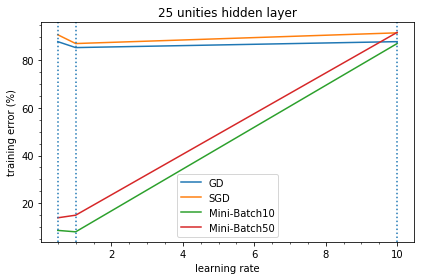

In [17]:
index = 0

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("25 unities hidden layer")
plt.legend()
plt.tight_layout()
plt.savefig('25-unities-hidden-layer.png', bbox_inches='tight', dpi = 100)
plt.show()

In [18]:
# GD.
use_model([0.5, 1, 10], [50, 50, 50], 'gd', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 2s 532us/step - loss: 2.3087 - acc: 0.1045 - val_loss: 2.2986 - val_acc: 0.1210
Epoch 2/10
4000/4000 [==============================] - 0s 112us/step - loss: 2.2988 - acc: 0.1125 - val_loss: 2.2970 - val_acc: 0.1210
Epoch 3/10
4000/4000 [==============================] - 0s 113us/step - loss: 2.2976 - acc: 0.1125 - val_loss: 2.2959 - val_acc: 0.1210
Epoch 4/10
4000/4000 [==============================] - 1s 184us/step - loss: 2.2965 - acc: 0.1125 - val_loss: 2.2947 - val_acc: 0.1210
Epoch 5/10
4000/4000 [==============================] - 1s 130us/step - loss: 2.2954 - acc: 0.1125 - val_loss: 2.2936 - val_acc: 0.1210
Epoch 6/10
4000/4000 [==============================] - 0s 101us/step - loss: 2.2943 - acc: 0.1125 - val_loss: 2.2924 - val_acc: 0.1210
Epoch 7/10
4000/4000 [==============================] - 0s 108us/step - loss: 2.2931 - acc: 0.1125 - val_loss: 2.2913 - val_acc: 0.1210


In [19]:
# SGD.
use_model([0.5, 1, 10], [50, 50, 50], 'sgd', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 39s 10ms/step - loss: 14.5888 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 2/10
4000/4000 [==============================] - 37s 9ms/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 3/10
4000/4000 [==============================] - 37s 9ms/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 4/10
4000/4000 [==============================] - 34s 9ms/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 5/10
4000/4000 [==============================] - 27s 7ms/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 6/10
4000/4000 [==============================] - 28s 7ms/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
Epoch 7/10
4000/4000 [==============================] - 33s 8ms/step - loss: 14.5949 - acc: 0.0945 - val_loss: 14.7642 - val_acc:

In [20]:
# MB10.
use_model([0.5, 1, 10], [50, 50, 50], 'mb10', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 11s 3ms/step - loss: 1.7496 - acc: 0.3483 - val_loss: 0.9083 - val_acc: 0.6780
Epoch 2/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.6655 - acc: 0.7757 - val_loss: 0.5959 - val_acc: 0.8020
Epoch 3/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4612 - acc: 0.8560 - val_loss: 0.4955 - val_acc: 0.8480
Epoch 4/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.3708 - acc: 0.8830 - val_loss: 0.4257 - val_acc: 0.8700
Epoch 5/10
4000/4000 [==============================] - 4s 962us/step - loss: 0.2976 - acc: 0.9065 - val_loss: 0.3909 - val_acc: 0.8900
Epoch 6/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.2391 - acc: 0.9185 - val_loss: 0.4190 - val_acc: 0.8740
Epoch 7/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.1950 - acc: 0.9397 - val_loss: 0.3836 - val_acc: 0.8930
Epoch 8/10


In [21]:
# MB50.
use_model([0.5, 1, 10], [50, 50, 50], 'mb50', 1, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 2s 445us/step - loss: 2.2599 - acc: 0.1593 - val_loss: 2.0697 - val_acc: 0.1980
Epoch 2/10
4000/4000 [==============================] - 1s 247us/step - loss: 1.6965 - acc: 0.3998 - val_loss: 1.4481 - val_acc: 0.4470
Epoch 3/10
4000/4000 [==============================] - 1s 240us/step - loss: 1.0115 - acc: 0.6513 - val_loss: 0.8435 - val_acc: 0.7550
Epoch 4/10
4000/4000 [==============================] - 1s 246us/step - loss: 0.6953 - acc: 0.7777 - val_loss: 0.5966 - val_acc: 0.8120
Epoch 5/10
4000/4000 [==============================] - 1s 237us/step - loss: 0.5578 - acc: 0.8247 - val_loss: 0.5116 - val_acc: 0.8430
Epoch 6/10
4000/4000 [==============================] - 1s 264us/step - loss: 0.4690 - acc: 0.8505 - val_loss: 0.4574 - val_acc: 0.8550
Epoch 7/10
4000/4000 [==============================] - 1s 243us/step - loss: 0.4178 - acc: 0.8742 - val_loss: 0.4823 - val_acc: 0.8600


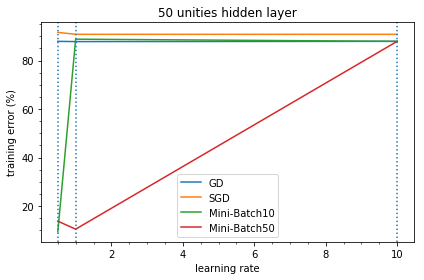

In [22]:
index = 1

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("50 unities hidden layer")
plt.legend()
plt.tight_layout()
plt.savefig('50-unities-hidden-layer.png', bbox_inches='tight', dpi = 100)
plt.show()

In [23]:
# GD.
use_model([0.5, 1, 10], [100, 100, 100], 'gd', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 2s 436us/step - loss: 2.3450 - acc: 0.0930 - val_loss: 2.3044 - val_acc: 0.1210
Epoch 2/10
4000/4000 [==============================] - 1s 172us/step - loss: 2.3098 - acc: 0.1125 - val_loss: 2.2989 - val_acc: 0.1660
Epoch 3/10
4000/4000 [==============================] - 0s 80us/step - loss: 2.2984 - acc: 0.1692 - val_loss: 2.2941 - val_acc: 0.1210
Epoch 4/10
4000/4000 [==============================] - 0s 69us/step - loss: 2.2957 - acc: 0.1125 - val_loss: 2.2928 - val_acc: 0.1210
Epoch 5/10
4000/4000 [==============================] - 0s 91us/step - loss: 2.2935 - acc: 0.1125 - val_loss: 2.2902 - val_acc: 0.1210
Epoch 6/10
4000/4000 [==============================] - 0s 103us/step - loss: 2.2914 - acc: 0.1125 - val_loss: 2.2883 - val_acc: 0.1210
Epoch 7/10
4000/4000 [==============================] - 0s 99us/step - loss: 2.2892 - acc: 0.1125 - val_loss: 2.2860 - val_acc: 0.1210
Epoc

In [24]:
# SGD.
use_model([0.5, 1, 10], [100, 100, 100], 'sgd', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 31s 8ms/step - loss: 14.6272 - acc: 0.0922 - val_loss: 14.6675 - val_acc: 0.0900
Epoch 2/10
4000/4000 [==============================] - 31s 8ms/step - loss: 14.6272 - acc: 0.0925 - val_loss: 14.6675 - val_acc: 0.0900
Epoch 3/10
4000/4000 [==============================] - 35s 9ms/step - loss: 14.6272 - acc: 0.0925 - val_loss: 14.6675 - val_acc: 0.0900
Epoch 4/10
4000/4000 [==============================] - 32s 8ms/step - loss: 14.6272 - acc: 0.0925 - val_loss: 14.6675 - val_acc: 0.0900
Epoch 5/10
4000/4000 [==============================] - 28s 7ms/step - loss: 14.6272 - acc: 0.0925 - val_loss: 14.6675 - val_acc: 0.0900
Epoch 6/10
4000/4000 [==============================] - 27s 7ms/step - loss: 14.6272 - acc: 0.0925 - val_loss: 14.6675 - val_acc: 0.0900
Epoch 7/10
4000/4000 [==============================] - 27s 7ms/step - loss: 14.6272 - acc: 0.0925 - val_loss: 14.6675 - val_acc: 

In [25]:
# MB10.
use_model([0.5, 1, 10], [100, 100, 100], 'mb10', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 5s 1ms/step - loss: 1.9750 - acc: 0.2650 - val_loss: 1.3325 - val_acc: 0.5130
Epoch 2/10
4000/4000 [==============================] - 4s 971us/step - loss: 0.8946 - acc: 0.6845 - val_loss: 0.6403 - val_acc: 0.8100
Epoch 3/10
4000/4000 [==============================] - 4s 928us/step - loss: 0.5182 - acc: 0.8245 - val_loss: 0.5997 - val_acc: 0.8050
Epoch 4/10
4000/4000 [==============================] - 4s 897us/step - loss: 0.4144 - acc: 0.8695 - val_loss: 0.5274 - val_acc: 0.8460
Epoch 5/10
4000/4000 [==============================] - 4s 929us/step - loss: 0.3345 - acc: 0.8925 - val_loss: 0.4119 - val_acc: 0.8750
Epoch 6/10
4000/4000 [==============================] - 4s 981us/step - loss: 0.2770 - acc: 0.9090 - val_loss: 0.4505 - val_acc: 0.8790
Epoch 7/10
4000/4000 [==============================] - 4s 939us/step - loss: 0.2597 - acc: 0.9197 - val_loss: 0.3985 - val_acc: 0.8810
Ep

In [26]:
# MB50.
use_model([0.5, 1, 10], [100, 100, 100], 'mb50', 2, 'lr')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 3s 633us/step - loss: 2.2308 - acc: 0.1668 - val_loss: 2.0289 - val_acc: 0.1580
Epoch 2/10
4000/4000 [==============================] - 1s 245us/step - loss: 1.5334 - acc: 0.4590 - val_loss: 1.2057 - val_acc: 0.5240
Epoch 3/10
4000/4000 [==============================] - 1s 241us/step - loss: 0.8703 - acc: 0.7045 - val_loss: 0.7697 - val_acc: 0.7130
Epoch 4/10
4000/4000 [==============================] - 1s 252us/step - loss: 0.6368 - acc: 0.7870 - val_loss: 0.5951 - val_acc: 0.8070
Epoch 5/10
4000/4000 [==============================] - 1s 268us/step - loss: 0.5232 - acc: 0.8287 - val_loss: 0.5364 - val_acc: 0.8330
Epoch 6/10
4000/4000 [==============================] - 1s 244us/step - loss: 0.4511 - acc: 0.8550 - val_loss: 0.4814 - val_acc: 0.8450
Epoch 7/10
4000/4000 [==============================] - 1s 254us/step - loss: 0.4140 - acc: 0.8640 - val_loss: 0.4985 - val_acc: 0.8470


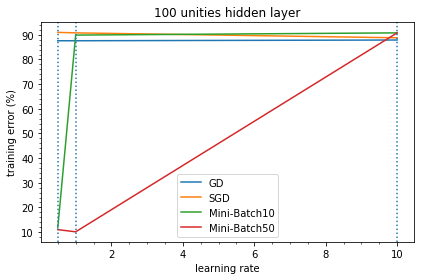

In [27]:
index = 2

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("100 unities hidden layer")
plt.legend()
plt.tight_layout()
plt.savefig('100-unities-hidden-layer.png', bbox_inches='tight', dpi = 100)
plt.show()

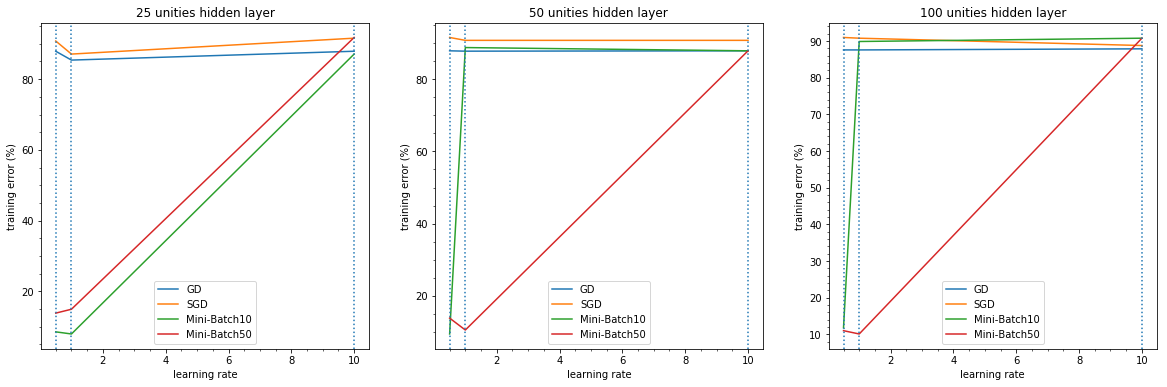

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))
ax1.plot(inputsGD[0], outputsGD[0], label='GD')
ax1.plot(inputsSGD[0], outputsSGD[0], label='SGD')
ax1.plot(inputsMiniBatch10[0], outputsMiniBatch10[0], label='Mini-Batch10')
ax1.plot(inputsMiniBatch50[0], outputsMiniBatch50[0], label='Mini-Batch50')
ax1.axvline(x=0.5, ls='dotted')
ax1.axvline(x=1, ls='dotted')
ax1.axvline(x=10, ls='dotted')
ax1.minorticks_on()
ax1.legend()
ax1.set_xlabel('learning rate')
ax1.set_ylabel('training error (%)')
ax1.set_title('25 unities hidden layer')

ax2.plot(inputsGD[1], outputsGD[1], label='GD')
ax2.plot(inputsSGD[1], outputsSGD[1], label='SGD')
ax2.plot(inputsMiniBatch10[1], outputsMiniBatch10[1], label='Mini-Batch10')
ax2.plot(inputsMiniBatch50[1], outputsMiniBatch50[1], label='Mini-Batch50')
ax2.axvline(x=0.5, ls='dotted')
ax2.axvline(x=1, ls='dotted')
ax2.axvline(x=10, ls='dotted')
ax2.minorticks_on()
ax2.legend()
ax2.set_xlabel('learning rate')
ax2.set_ylabel('training error (%)')
ax2.set_title('50 unities hidden layer')

ax3.plot(inputsGD[2], outputsGD[2], label='GD')
ax3.plot(inputsSGD[2], outputsSGD[2], label='SGD')
ax3.plot(inputsMiniBatch10[2], outputsMiniBatch10[2], label='Mini-Batch10')
ax3.plot(inputsMiniBatch50[2], outputsMiniBatch50[2], label='Mini-Batch50')
ax3.axvline(x=0.5, ls='dotted')
ax3.axvline(x=1, ls='dotted')
ax3.axvline(x=10, ls='dotted')
ax3.minorticks_on()
ax3.legend()
ax3.set_xlabel('learning rate')
ax3.set_ylabel('training error (%)')
ax3.set_title('100 unities hidden layer')
f.savefig('comparison-hidden-layer.png', bbox_inches='tight', dpi = 100)

# Discussão dos Resultados

Primeiramente, podemos notar nos gráficos apresentados acima que dois dos gradientes testados nunca obtiveram resultados interessantes para o problema de classificação de imagens (aka MNIS), i.e., GD e SGD obtiveram resultados muito ruins para o training error. As condições definidas no enunciado do TP podem ter influenciado diretamente os resultados desses dois gradientes em termos do uso da sigmoid para não linearidade e também do learning rate ter sido uma medida um pouco elevada (i.e., 0.5 foi o meno4 valor testado e 10 o maior valor testado). 
//Checar essa afirmação após os testes
A junção dos resultados é mostrada nos três gráficos gerados logo acima. Assim, o mini-batch foi o gradiente mais eficiente entre os testados, com destaque para o mini-batch de 10 batches que obteve resultados ligeiramente melhores do que o mini-batch de 50. 

O training error foi baixo se considerarmos que o conjunto de teste foi o próprio conjunto de treino, prática essa que deve ser evitada em casos reais de aplicação de algoritmos de machine learning no mundo real. Assim, embora o training error ter sido baixo em dois dos gradientes testados (i.e., mini-batch de 10 e 50), isso não significa que o nosso modelo seja bom, pois o test error pode ser alto. É importante notar que o learning rate de 10 sempre convergiu para os 4 tipos de gradientes testados, no sentido de que todos eles obtiveram resultados muitos ruins com este learning rate. Como vimos em sala de aula, muitos dos modelos de machine learning amplamente usados na academia usam um learning rate de 0.1. No entanto, a aplicação de um learning rate de 10 assim como no último dos testes realizados mostrou que este valor era altíssimo para o problema de classificação de imagens. Sendo que este learning rate obteve um training error de cerca de 90% para todos os 3 gradientes testados independente das outras métricas do modelo.

Desta forma, eu aprendi que em uma análise real do MNIST o mais adequado seria ter um conjunto de treino (assim como foi testado o modelo), um conjunto de teste, e mesmo a separação em um conjunto de validação com uma cross-validation seria o cenário perfeito de teste se estivéssemos tratando de um caso real de aplicação de machine learning. Em relação ao aumento das unidades da camada oculta para os três algoritmos, vamos realizar um teste exclusivo deste parâmetro para sabermos o seu real comportamento no conjunto de treino, para tal, o learning rate vai ser fixado em 0.5, que como visto nos três gráficos acima é o melhor learning rate obtido para quase todos gradientes. Somente o GD obteve resultados minimamente melhores com um learning rate de 1 em vez de 0.5. 

Como visto no gráfico abaixo, o aumento no número de unidades da camada oculta é relevante para o mini-batch de 10, onde os melhores resultados são encontrados com 100 unidades na camada oculta. Todavia, este aumento não se mostrou relevante para os outros gradientes, detalhe para o mini-batch de 50 que obteve piores resultados com 100 unidades na camada oculta do que com somente 50 (que foram os melhores resultados obtidos por esse gradiente). 

In [29]:
# GD.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'gd', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 2s 459us/step - loss: 2.3060 - acc: 0.1185 - val_loss: 2.2987 - val_acc: 0.0950
Epoch 2/10
4000/4000 [==============================] - 0s 66us/step - loss: 2.3021 - acc: 0.0925 - val_loss: 2.2983 - val_acc: 0.1210
Epoch 3/10
4000/4000 [==============================] - 0s 60us/step - loss: 2.3004 - acc: 0.1130 - val_loss: 2.2982 - val_acc: 0.1210
Epoch 4/10
4000/4000 [==============================] - 0s 61us/step - loss: 2.2995 - acc: 0.1125 - val_loss: 2.2979 - val_acc: 0.1210
Epoch 5/10
4000/4000 [==============================] - 0s 69us/step - loss: 2.2988 - acc: 0.1125 - val_loss: 2.2975 - val_acc: 0.1210
Epoch 6/10
4000/4000 [==============================] - 0s 62us/step - loss: 2.2982 - acc: 0.1125 - val_loss: 2.2971 - val_acc: 0.1210
Epoch 7/10
4000/4000 [==============================] - 0s 59us/step - loss: 2.2976 - acc: 0.1125 - val_loss: 2.2966 - val_acc: 0.1210
Epoch 

In [30]:
# SGD.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'sgd', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 32s 8ms/step - loss: 3.0082 - acc: 0.0935 - val_loss: 3.3637 - val_acc: 0.0840
Epoch 2/10
4000/4000 [==============================] - 33s 8ms/step - loss: 2.9375 - acc: 0.1310 - val_loss: 3.0222 - val_acc: 0.1290
Epoch 3/10
4000/4000 [==============================] - 31s 8ms/step - loss: 2.8088 - acc: 0.1570 - val_loss: 3.1985 - val_acc: 0.1800
Epoch 4/10
4000/4000 [==============================] - 30s 7ms/step - loss: 2.9328 - acc: 0.1645 - val_loss: 3.1909 - val_acc: 0.1230
Epoch 5/10
4000/4000 [==============================] - 32s 8ms/step - loss: 3.0748 - acc: 0.1498 - val_loss: 2.7518 - val_acc: 0.2010
Epoch 6/10
4000/4000 [==============================] - 33s 8ms/step - loss: 2.9283 - acc: 0.1943 - val_loss: 2.3589 - val_acc: 0.2190
Epoch 7/10
4000/4000 [==============================] - 31s 8ms/step - loss: 2.8477 - acc: 0.1983 - val_loss: 3.0747 - val_acc: 0.2100
Epoch 8

In [31]:
# MB10.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'mb10', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 10s 3ms/step - loss: 1.8111 - acc: 0.3293 - val_loss: 1.3513 - val_acc: 0.4830
Epoch 2/10
4000/4000 [==============================] - 6s 2ms/step - loss: 0.7738 - acc: 0.7303 - val_loss: 0.5806 - val_acc: 0.8150
Epoch 3/10
4000/4000 [==============================] - 6s 2ms/step - loss: 0.5301 - acc: 0.8287 - val_loss: 0.6025 - val_acc: 0.8200
Epoch 4/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4314 - acc: 0.8632 - val_loss: 0.4538 - val_acc: 0.8590
Epoch 5/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.3854 - acc: 0.8760 - val_loss: 0.4498 - val_acc: 0.8590
Epoch 6/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.3159 - acc: 0.9002 - val_loss: 0.4267 - val_acc: 0.8780
Epoch 7/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.2607 - acc: 0.9167 - val_loss: 0.4060 - val_acc: 0.8700
Epoch 8/10
40

In [32]:
# MB50.
use_model([0.5, 0.5, 0.5], [25, 50, 100], 'mb50', 3, 'un')

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 3s 789us/step - loss: 2.2777 - acc: 0.1445 - val_loss: 2.1472 - val_acc: 0.3630
Epoch 2/10
4000/4000 [==============================] - 1s 255us/step - loss: 1.8189 - acc: 0.3693 - val_loss: 1.3989 - val_acc: 0.4880
Epoch 3/10
4000/4000 [==============================] - 1s 287us/step - loss: 1.1610 - acc: 0.6110 - val_loss: 1.0409 - val_acc: 0.6660
Epoch 4/10
4000/4000 [==============================] - 1s 278us/step - loss: 0.8244 - acc: 0.7422 - val_loss: 0.6768 - val_acc: 0.7910
Epoch 5/10
4000/4000 [==============================] - 1s 267us/step - loss: 0.6426 - acc: 0.8040 - val_loss: 0.5722 - val_acc: 0.8350
Epoch 6/10
4000/4000 [==============================] - 1s 317us/step - loss: 0.5574 - acc: 0.8265 - val_loss: 0.5566 - val_acc: 0.8260
Epoch 7/10
4000/4000 [==============================] - 1s 288us/step - loss: 0.4814 - acc: 0.8457 - val_loss: 0.4634 - val_acc: 0.8570


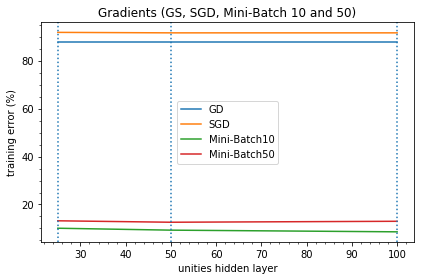

In [33]:
index = 3

plt.plot(inputsGD[index], outputsGD[index], label='GD')
plt.plot(inputsSGD[index], outputsSGD[index], label='SGD')
plt.plot(inputsMiniBatch10[index], outputsMiniBatch10[index], label='Mini-Batch10')
plt.plot(inputsMiniBatch50[index], outputsMiniBatch50[index], label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Gradients (GS, SGD, Mini-Batch 10 and 50)")
plt.legend()
plt.tight_layout()
plt.savefig('comparison-gradients.png', bbox_inches='tight', dpi = 100)
plt.show()

# Testes Complementares

#### Apesar de não estar previsto no enunciado do TP, vamos variar alguns dos parâmetros:

## <span style="color:blue"> Setar para somente uma única época comparando com learning rate </span>

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 8s 2ms/step - loss: 1.7403 - acc: 0.3543 - val_loss: 0.9241 - val_acc: 0.6520
34.8
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 8s 2ms/step - loss: 14.5265 - acc: 0.0945 - val_loss: 14.7642 - val_acc: 0.0840
91.6
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 7s 2ms/step - loss: 14.5765 - acc: 0.0935 - val_loss: 14.7642 - val_acc: 0.0840
91.6


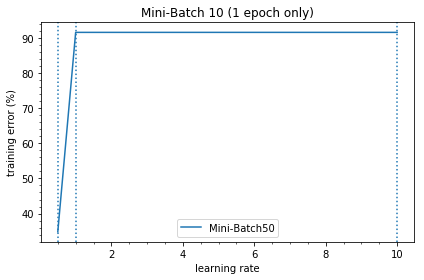

In [34]:
lr = [0.5, 1, 10]
un = [100, 100, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(lr, outputs, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Mini-Batch 10 (1 epoch only)")
plt.legend()
plt.tight_layout()
plt.savefig('one-epoch.png', bbox_inches='tight', dpi = 100)
plt.show()

### Discussão sobre setar somente uma época para execução do modelo (variando o learning rate): Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 

## <span style="color:blue">Setar para somente uma única época comparando com as unidades da camada oculta</span>

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 9s 2ms/step - loss: 4.2002 - acc: 0.1043 - val_loss: 3.0745 - val_acc: 0.1010
89.9
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 8s 2ms/step - loss: 2.2984 - acc: 0.2165 - val_loss: 1.0739 - val_acc: 0.6000
40.0
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 8s 2ms/step - loss: 14.3314 - acc: 0.1055 - val_loss: 14.3129 - val_acc: 0.1120
88.8


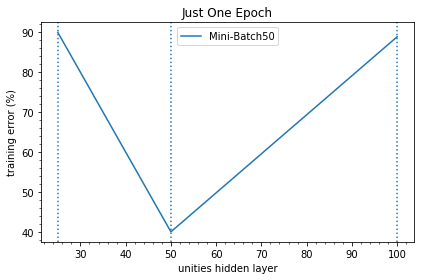

In [43]:
lr = [1, 1, 1]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(un, outputs, label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Just One Epoch")
plt.legend()
plt.tight_layout()
plt.savefig('img/one-epoch-unities.png', bbox_inches='tight', dpi = 100)
plt.show()

### Discussão sobre setar somente uma época para execução do modelo (variando as unidades da camada oculta): Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 

## Setar o learning rate para 0.2

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 7s 2ms/step - loss: 2.0919 - acc: 0.2408 - val_loss: 1.5433 - val_acc: 0.4770
Epoch 2/10
4000/4000 [==============================] - 5s 1ms/step - loss: 1.0569 - acc: 0.6428 - val_loss: 0.7931 - val_acc: 0.7220
Epoch 3/10
4000/4000 [==============================] - 4s 944us/step - loss: 0.6313 - acc: 0.8012 - val_loss: 0.5921 - val_acc: 0.7980
Epoch 4/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.4727 - acc: 0.8560 - val_loss: 0.5354 - val_acc: 0.8230
Epoch 5/10
4000/4000 [==============================] - 4s 1ms/step - loss: 0.4027 - acc: 0.8780 - val_loss: 0.4372 - val_acc: 0.8680
Epoch 6/10
4000/4000 [==============================] - 5s 1ms/step - loss: 0.3461 - acc: 0.8965 - val_loss: 0.4103 - val_acc: 0.8730
Epoch 7/10
4000/4000 [==============================] - 6s 2ms/step - loss: 0.3105 - acc: 0.9022 - val_loss: 0.4525 - val_acc: 0.8680
Epoch 8/10
4

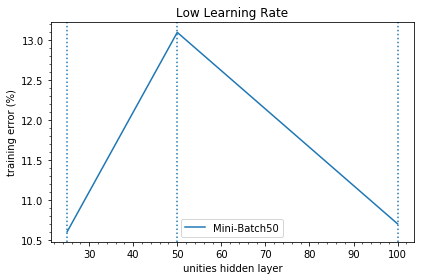

In [36]:
lr = [0.2, 0.2, 0.2]
un = [25, 50, 100]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(un, outputs, label='Mini-Batch50')
plt.xlabel('unities hidden layer')
plt.axvline(x=25, ls='dotted')
plt.axvline(x=50, ls='dotted')
plt.axvline(x=100, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Low Learning Rate")
plt.legend()
plt.tight_layout()
plt.savefig('low-learning-rate.png', bbox_inches='tight', dpi = 100)
plt.show()

### Discussão sobre diminuir o learning rate: Com apenas uma época os resultados são piores do que com 10 épocas que foi a metodologia adotada durante todos os experimentos do trabalho. 

## Usar relu

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 15s 4ms/step - loss: 13.9389 - acc: 0.1070 - val_loss: 14.6352 - val_acc: 0.0920
90.8
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 11s 3ms/step - loss: 14.4431 - acc: 0.0970 - val_loss: 14.0389 - val_acc: 0.1290
87.1
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 11s 3ms/step - loss: 14.5685 - acc: 0.0943 - val_loss: 14.7642 - val_acc: 0.0840
91.6


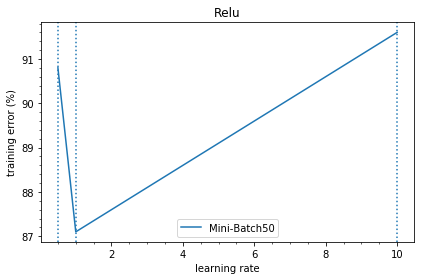

In [37]:
# Define model
def baseline_model_relu(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(unity, input_dim=unity, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

lr = [0.5, 1, 10]
un = [50, 50, 50]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model_relu(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(lr, outputs, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Relu")
plt.legend()
plt.tight_layout()
plt.savefig('relu.png', bbox_inches='tight', dpi = 100)
plt.show()

## Usar some 2 camadas

Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 11s 3ms/step - loss: 13.9230 - acc: 0.1158 - val_loss: 14.1678 - val_acc: 0.1210
87.9
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 13s 3ms/step - loss: 14.2237 - acc: 0.1053 - val_loss: 14.3129 - val_acc: 0.1120
88.8
Train on 4000 samples, validate on 1000 samples
Epoch 1/1
4000/4000 [==============================] - 11s 3ms/step - loss: 14.4096 - acc: 0.1038 - val_loss: 14.7964 - val_acc: 0.0820
91.8


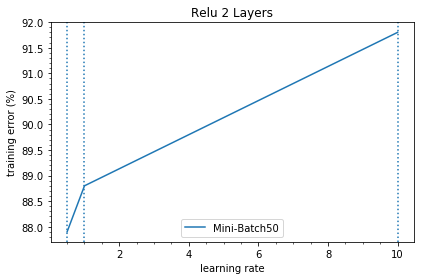

In [38]:
# Define model
def baseline_model_relu(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Set the gradient
    sgd = optimizers.SGD(lr=learning_rate)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

lr = [0.5, 1, 10]
un = [50, 50, 50]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model_relu(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(lr, outputs, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Relu 2 Layers")
plt.legend()
plt.tight_layout()
plt.savefig('relu-2-layer.png', bbox_inches='tight', dpi = 100)
plt.show()

## Usar adam como gradient

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 13s 3ms/step - loss: 0.5196 - acc: 0.8450 - val_loss: 0.3387 - val_acc: 0.8930
Epoch 2/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.2031 - acc: 0.9362 - val_loss: 0.3130 - val_acc: 0.9010
Epoch 3/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.1159 - acc: 0.9630 - val_loss: 0.3051 - val_acc: 0.9130
Epoch 4/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.0577 - acc: 0.9830 - val_loss: 0.2843 - val_acc: 0.9160
Epoch 5/10
4000/4000 [==============================] - 10s 2ms/step - loss: 0.0284 - acc: 0.9955 - val_loss: 0.2905 - val_acc: 0.9250
Epoch 6/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.0147 - acc: 0.9982 - val_loss: 0.2765 - val_acc: 0.9220
Epoch 7/10
4000/4000 [==============================] - 9s 2ms/step - loss: 0.0202 - acc: 0.9945 - val_loss: 0.2775 - val_acc: 0.9300
Epoch 8/10
4

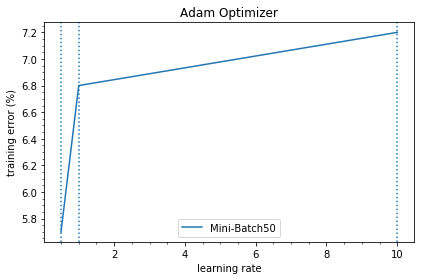

In [40]:
# Define model
def baseline_model_relu(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lr = [0.5, 1, 10]
un = [50, 50, 50]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model_relu(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=10, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(lr, outputs, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Adam Optimizer")
plt.legend()
plt.tight_layout()
plt.savefig('adam-gradient.png', bbox_inches='tight', dpi = 100)
plt.show()

## Usar batch maiores

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 7s 2ms/step - loss: 1.0158 - acc: 0.7232 - val_loss: 0.5246 - val_acc: 0.8460
Epoch 2/10
4000/4000 [==============================] - 1s 180us/step - loss: 0.3887 - acc: 0.8855 - val_loss: 0.4147 - val_acc: 0.8810
Epoch 3/10
4000/4000 [==============================] - 1s 154us/step - loss: 0.2832 - acc: 0.9195 - val_loss: 0.3610 - val_acc: 0.8900
Epoch 4/10
4000/4000 [==============================] - 1s 178us/step - loss: 0.2189 - acc: 0.9420 - val_loss: 0.3569 - val_acc: 0.8960
Epoch 5/10
4000/4000 [==============================] - 1s 139us/step - loss: 0.1748 - acc: 0.9560 - val_loss: 0.3264 - val_acc: 0.9080
Epoch 6/10
4000/4000 [==============================] - 1s 127us/step - loss: 0.1430 - acc: 0.9645 - val_loss: 0.3106 - val_acc: 0.9100
Epoch 7/10
4000/4000 [==============================] - 1s 154us/step - loss: 0.1148 - acc: 0.9760 - val_loss: 0.2952 - val_acc: 0.9100
Ep

/usr/local/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.185128). Check your callbacks.
  % delta_t_median)


4000/4000 [==============================] - 21s 5ms/step - loss: 1.0602 - acc: 0.6965 - val_loss: 0.5270 - val_acc: 0.8470
Epoch 2/10
4000/4000 [==============================] - 1s 368us/step - loss: 0.3929 - acc: 0.8818 - val_loss: 0.4171 - val_acc: 0.8710
Epoch 3/10
4000/4000 [==============================] - 1s 210us/step - loss: 0.2822 - acc: 0.9208 - val_loss: 0.3598 - val_acc: 0.8980
Epoch 4/10
4000/4000 [==============================] - 1s 201us/step - loss: 0.2201 - acc: 0.9377 - val_loss: 0.3426 - val_acc: 0.8950
Epoch 5/10
4000/4000 [==============================] - 1s 197us/step - loss: 0.1750 - acc: 0.9562 - val_loss: 0.3363 - val_acc: 0.8980
Epoch 6/10
4000/4000 [==============================] - 1s 233us/step - loss: 0.1423 - acc: 0.9675 - val_loss: 0.3154 - val_acc: 0.9070
Epoch 7/10
4000/4000 [==============================] - 1s 206us/step - loss: 0.1145 - acc: 0.9763 - val_loss: 0.2891 - val_acc: 0.9120
Epoch 8/10
4000/4000 [==============================] - 1s 2

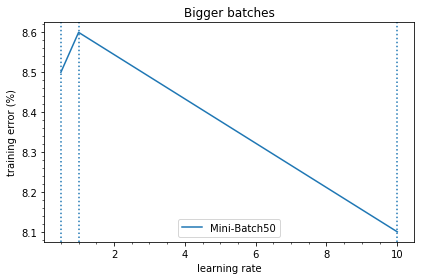

In [46]:
# Define model
def baseline_model_relu(unity, learning_rate):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lr = [0.5, 1, 10]
un = [50, 50, 50]
outputs = []

for i, u in zip(lr, un):
    model = baseline_model_relu(u, i)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=1)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(100-scores[1]*100)
    outputs.append(100-scores[1]*100)
    
plt.plot(lr, outputs, label='Mini-Batch50')
plt.xlabel('learning rate')
plt.axvline(x=0.5, ls='dotted')
plt.axvline(x=1, ls='dotted')
plt.axvline(x=10, ls='dotted')
plt.minorticks_on()
plt.ylabel('training error (%)')
plt.title("Bigger batches")
plt.legend()
plt.tight_layout()
plt.savefig('img/batches-maiores.png', bbox_inches='tight', dpi = 100)
plt.show()